In [ ]:
import pandas as pd
df = pd.read_csv('/content/Iris.csv')



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


<Axes: ylabel='SepalLengthCm'>

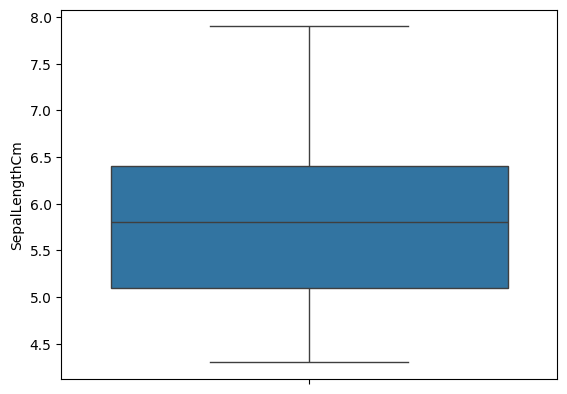

In [ ]:
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])


<Axes: ylabel='SepalWidthCm'>

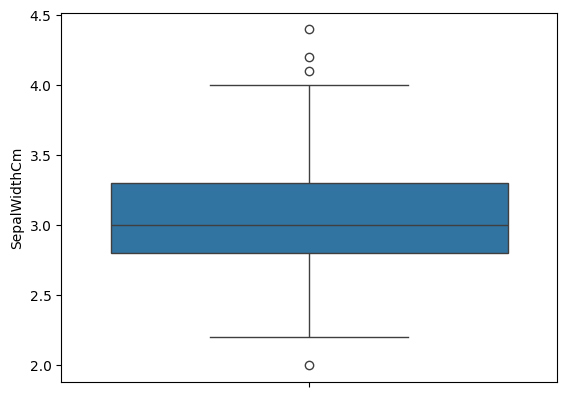

In [ ]:
sns.boxplot(df['SepalWidthCm'])




In [ ]:
q1 = df['SepalWidthCm'].quantile(0.25)
print(q1)


2.8


In [ ]:
q3 = df['SepalWidthCm'].quantile(0.75)
q3

3.3

In [ ]:
IQR = q3-q1
IQR

0.5

In [ ]:
lowerBound = q1 -(1.5*IQR)
print(lowerBound)
upperBound = q3 + (1.5*IQR)
print(upperBound)

2.05
4.05


<Axes: ylabel='SepalWidthCm'>

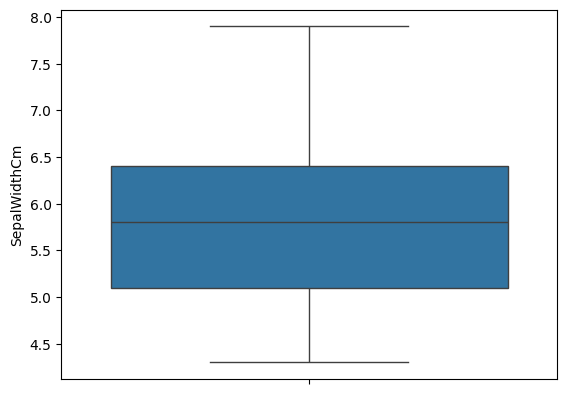

In [ ]:
import numpy as np
df['SepalWidthCm']=np.where(df['SepalWidthCm']<upperBound,upperBound,df['SepalWidthCm'])
sns.boxplot(df['SepalWidthCm'])


<Axes: ylabel='PetalLengthCm'>

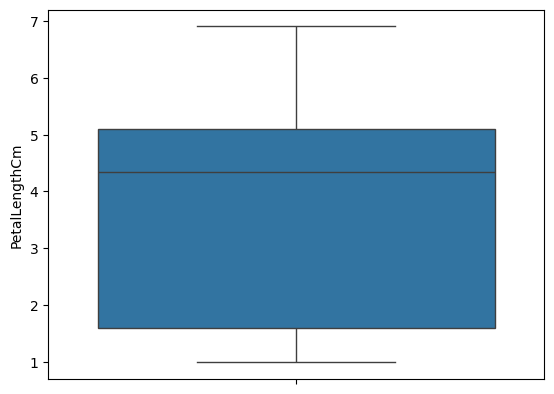

In [ ]:
sns.boxplot(df['PetalLengthCm'])


<Axes: ylabel='PetalWidthCm'>

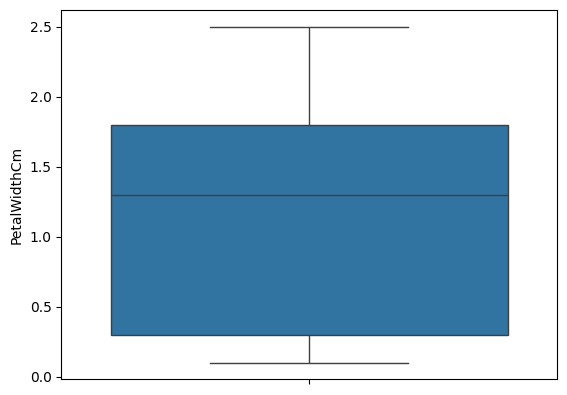

In [ ]:
sns.boxplot(df['PetalWidthCm'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: ylabel='Species'>

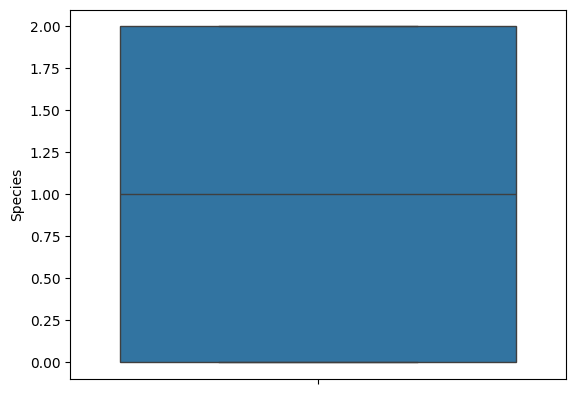

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']=le.fit_transform(df[['Species']])
sns.boxplot(df['Species'])

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df['Id']=Scaler.fit_transform(df[['Id']])
df['SepalLengthCm']=Scaler.fit_transform(df[['SepalLengthCm']])
df['SepalWidthCm']=Scaler.fit_transform(df[['SepalWidthCm']])
df['PetalLengthCm']=Scaler.fit_transform(df[['PetalLengthCm']])
df['PetalWidthCm']=Scaler.fit_transform(df[['PetalWidthCm']])


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,-0.900681,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-1.143017,-1.341272,-1.312977,0
2,-1.674353,-1.385353,-1.385353,-1.398138,-1.312977,0
3,-1.651258,-1.506521,-1.506521,-1.284407,-1.312977,0
4,-1.628164,-1.021849,-1.021849,-1.341272,-1.312977,0


In [ ]:
x= df.iloc[:,0:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,-0.900681,-1.341272,-1.312977
1,-1.697448,-1.143017,-1.143017,-1.341272,-1.312977
2,-1.674353,-1.385353,-1.385353,-1.398138,-1.312977
3,-1.651258,-1.506521,-1.506521,-1.284407,-1.312977
4,-1.628164,-1.021849,-1.021849,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,1.038005,0.819624,1.447956
146,1.651258,0.553333,0.553333,0.705893,0.922064
147,1.674353,0.795669,0.795669,0.819624,1.053537
148,1.697448,0.432165,0.432165,0.933356,1.447956


In [ ]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(120, 5)

In [ ]:
x_test.shape

(30, 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
dtc.predict([[151,0.5,1,2,1.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

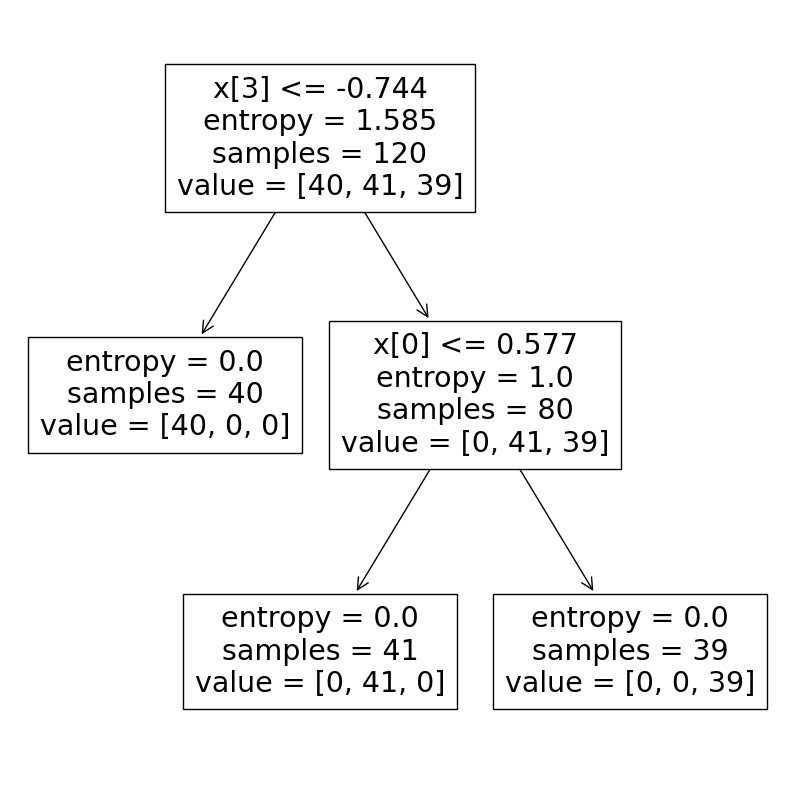

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtc.fit(x_train,y_train))
plt.show()